## Oxford AI Summit: Group 4 Submission

## Business Problem

Ralph Lauren, being a global leader in the design, marketing, and distribution of premium lifestyle products, has a large volume of fashion inventory. Managing such a vast inventory and providing personalized product recommendations to customers can be quite challenging.

Challenges:

* Inventory Management: With a large variety of products, keeping track of inventory levels, predicting demand, and planning production can be complex. Overproduction can lead to increased storage costs and potential waste of resources if products don’t sell. Underproduction, on the other hand, can lead to missed sales opportunities and unsatisfied customers.

* Product Recommendations: With a diverse customer base, understanding individual preferences to provide personalized product recommendations is not straightforward. The challenge is to analyze customer behavior and predict what products a customer might be interested in.

## Our Solution

### Convolutional Neural Network (CNN) for Clothes Classification:

A Convolutional Neural Network (CNN) is a type of deep learning model that is widely used for image classification tasks. In the context of Ralph Lauren, a CNN can be trained to classify images of clothing items into different categories such as shirts, pants, dresses, etc.

The CNN would take an image of a clothing item as input and pass it through several layers of convolutional, ReLU (Rectified Linear Unit), pooling, and fully connected layers to output a probability distribution over the predefined classes. The class with the highest probability would be the model’s prediction for the type of clothing in the input image.

Here’s a breakdown of the layers:

* Conv2D(32, (3, 3), activation=‘relu’, input_shape=(28, 28, 1)): This is the first convolutional layer of the network. It uses 32 filters, each of size 3x3. The activation function is ‘relu’ (Rectified Linear Unit), which introduces non-linearity into the model. The input_shape=(28, 28, 1) indicates that the input images are 28x28 pixels with 1 color channel (grayscale).
* MaxPooling2D((2, 2)): This is a max pooling layer, which reduces the spatial dimensions (width, height) of the input by taking the maximum value over a 2x2 window.
* Conv2D(64, (3, 3), activation=‘relu’): This is the second convolutional layer, which uses 64 filters of size 3x3. The ‘relu’ activation function is used here as well.
* MaxPooling2D((2, 2)): This is another max pooling layer, which further reduces the spatial dimensions of the input.
* Conv2D(64, (3, 3), activation=‘relu’): This is the third convolutional layer with 64 filters of size 3x3 and ‘relu’ activation.
* Flatten(): This layer flattens the input, i.e., it converts the 2D matrix (image) into a 1D vector to be used by the fully connected layers.
* Dense(64, activation=‘relu’): This is a fully connected layer (also known as a dense layer), which performs a linear operation on the layer’s input vector. It has 64 neurons and uses the ‘relu’ activation function.
* Dropout(0.5): This layer randomly sets half (rate=0.5) of the input units to 0 at each update during training, which helps prevent overfitting.
* Dense(10, activation=‘softmax’): This is the output layer of the network. It has 10 neurons (assuming we have 10 classes to predict) and uses the ‘softmax’ activation function, which makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

## Value

Fashion Trend Prediction and Inventory Management:

A CNN can be trained to classify images of Ralph Lauren’s clothing items into different categories such as shirts, pants, dresses, etc. This classifier can be used to analyze the images of clothing items sold online or in stores.

* Inventory Management: Based on the trend prediction, Ralph Lauren can manage their inventory more effectively. If a certain style is trending, they can increase the production of that item to meet the demand. Conversely, if a style is not selling well, they can reduce its production to minimize losses.

* Personalized Recommendations: The CNN can also be used to provide personalized recommendations to customers. By analyzing a customer’s purchase history, the CNN can recommend items that are similar to what the customer has bought in the past.
Quality Control: The CNN can be used to inspect the quality of the items. By training the CNN to recognize defects in clothing items, Ralph Lauren can ensure that only high-quality items are sold.

# Phase 1: Demo
###  Below is a Python code using Keras to load the Fashion MNIST data, train a Convolutional Neural Network (CNN) model, evaluate its performance, visualize the performance, and save the model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import requests
from io import BytesIO
import os



In [ ]:

# Load Fashion MNIST data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# List of class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



4422102/4422102 [==============================] - 0s 0us/step


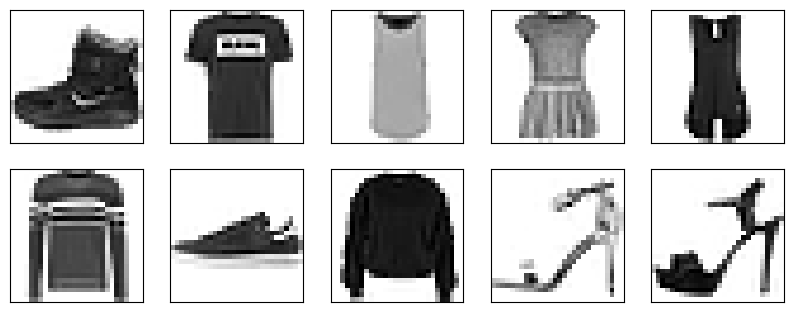

In [ ]:

# Visualize the data
def show_sample_images(train_images, sample_size=10):
    """
    Displays a sample of images from the Fashion MNIST training dataset.

    Parameters:
    - train_images: numpy array of training images.
    - train_labels: numpy array of training labels.
    - class_names: list of class names corresponding to the labels.
    - sample_size: number of images to display (default is 10).
    """
    plt.figure(figsize=(10, 10))
    for i in range(sample_size):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.show()

show_sample_images(train_images)



In [ ]:

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the path where the model weights will be saved
model_weights_path = 'fashion_mnist_model.h5'

# Check if the model weights file exists
if os.path.exists(model_weights_path):
    print("Loading existing model weights.")
    model.load_weights(model_weights_path)
else:
    print("No saved model found, training a new model.")
    # Train the model and save the best weights
    checkpoint = ModelCheckpoint(model_weights_path, save_best_only=True)
    history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, callbacks=[checkpoint])


Loading existing model weights.


313/313 [==============================] - 3s 8ms/step - loss: 0.2753 - accuracy: 0.9018
Test accuracy: 0.9018


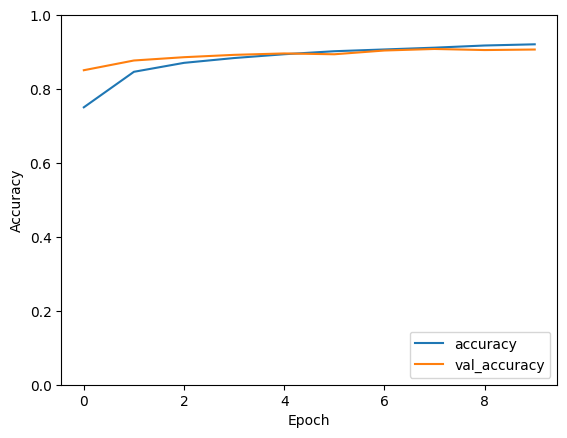

In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# Visualize the model performance
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
#Plot confusion matrix
def plot_confusion_matrix(model, test_images, test_labels, class_names):
    """
    Plots a confusion matrix using the predictions from a Keras model.

    Parameters:
    - model: trained Keras model.
    - test_images: numpy array of test images.
    - test_labels: numpy array of true labels for the test images.
    - class_names: list of class names corresponding to the labels.
    """
    # Get the model's predictions
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(test_labels, axis=1)

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(model, test_images, test_labels, class_names)


NameError: name 'model' is not defined

In [ ]:

# Save the model
model.save('fashion_mnist_model_final.h5')


# Phase 2: Better model using Huggingface

In [ ]:



# Load the model and processor
processor = AutoImageProcessor.from_pretrained("harshp8l/Fashion-Product-Images")
model = AutoModelForImageClassification.from_pretrained("harshp8l/Fashion-Product-Images")


In [ ]:

# Function to load, display and predict the class of an image
def classify_image(image_url):
    """
    Loads an image from a URL, displays it, and predicts the class using a Hugging Face model.

    Parameters:
    - image_url: URL of the image to be classified.
    """
    # Load image from the URL
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()

    # Preprocess the image and prepare it for the model
    inputs = processor(images=image, return_tensors="pt")

    # Predict the class of the image
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()

    # Retrieve the class name using the predicted class index
    class_name = model.config.id2label[predicted_class_idx]
    print(f"\nPredicted class: {class_name}")


In [ ]:

# Example usage:
image_urls = [
             'https://media.loaf.com/image/upload/c_crop,h_857,w_1200,x_0,y_21/f_auto/q_auto/c_pad,h_786,w_1100/website/images/original/512789-sockins-sofa-sock-in-burnt-orange-stripe-full-sock-option-3.jpg',
             'https://photos6.spartoo.co.uk/photos/245/24595191/24595191_1200_A.jpg',
             'https://clobbercartelz.com/cdn/shop/files/7A3AD657-B9ED-48E6-97AF-85870FA7DC41.jpg']
for image_url in image_urls:
    classify_image(image_url)


# Phase 3: Sexy Graph Database Search Solution with Graph RAG, Neo4J and LlamaIndex

#TODO

# Phase 4: 💰